In [1]:
import numpy as np
import matplotlib.pyplot as pl
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import accuracy_score
%matplotlib inline

# Linear regression

First define our observations, a straight line with some noise added.

(100, 1) (100, 1)


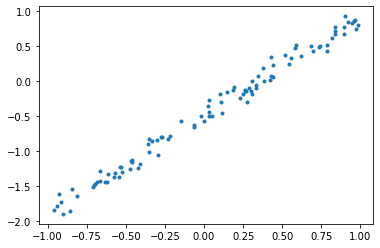

In [2]:
n = 100
x_obs = 2 * np.random.rand(n,1) - 1.0
y_obs = 1.4 * x_obs - 0.5 + 0.1 * np.random.randn(n,1)
f, ax = pl.subplots()
ax.plot(x_obs[:,0], y_obs[:,0], '.')
print(x_obs.shape, y_obs.shape)

Then we define a very simple linear neural network, that takes as input a single parameter (x) and outputs just a single number (y).

In [3]:
class model(nn.Module):
    def __init__(self):
        super(model, self).__init__()

        self.linear = nn.Linear(1, 1)
        
    def forward(self, x):
        return self.linear(x)
    
mod = model()

The neural network is now trained using the standard loop in PyTorch.

In [4]:
optimizer = torch.optim.Adam(mod.parameters(), lr=5e-2)
loss_fn = nn.MSELoss()

x_torch = torch.from_numpy(x_obs.astype('float32'))
y_torch = torch.from_numpy(y_obs.astype('float32'))

for loop in range(50):
    optimizer.zero_grad()
    out = mod(x_torch)
    loss = loss_fn(out, y_torch)
    loss.backward()
    optimizer.step()
    print(f' It : {loop:3d} - loss : {loss.item():.4f} - residual std : {np.sqrt(loss.item()):.4f}')

 It :   0 - loss : 1.3169 - residual std : 1.1475
 It :   1 - loss : 1.2023 - residual std : 1.0965
 It :   2 - loss : 1.0941 - residual std : 1.0460
 It :   3 - loss : 0.9924 - residual std : 0.9962
 It :   4 - loss : 0.8971 - residual std : 0.9471
 It :   5 - loss : 0.8083 - residual std : 0.8991
 It :   6 - loss : 0.7261 - residual std : 0.8521
 It :   7 - loss : 0.6504 - residual std : 0.8065
 It :   8 - loss : 0.5811 - residual std : 0.7623
 It :   9 - loss : 0.5181 - residual std : 0.7198
 It :  10 - loss : 0.4611 - residual std : 0.6791
 It :  11 - loss : 0.4100 - residual std : 0.6403
 It :  12 - loss : 0.3645 - residual std : 0.6037
 It :  13 - loss : 0.3241 - residual std : 0.5693
 It :  14 - loss : 0.2886 - residual std : 0.5372
 It :  15 - loss : 0.2574 - residual std : 0.5074
 It :  16 - loss : 0.2301 - residual std : 0.4797
 It :  17 - loss : 0.2063 - residual std : 0.4542
 It :  18 - loss : 0.1854 - residual std : 0.4306
 It :  19 - loss : 0.1671 - residual std : 0.4087


We print now the weight and bias of the single layer that we use and we can check that we are recovering the original value. We have just solved a linear regression problem using the maximum likelihood approach.

In [5]:
print(mod.linear.weight, mod.linear.bias)

Parameter containing:
tensor([[1.4839]], requires_grad=True) Parameter containing:
tensor([-0.4561], requires_grad=True)


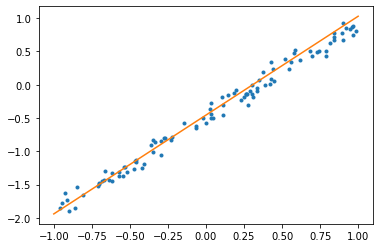

In [6]:
x_np = np.expand_dims(np.linspace(-1,1,100), axis=-1)
x = torch.from_numpy(x_np.astype('float32'))
out = mod(x)
out_np = out.detach().numpy()
f, ax = pl.subplots()
ax.plot(x_obs[:,0], y_obs[:,0], '.')
ax.plot(x_np[:,0], out_np[:,0])

# Nonlinear regression

(100, 1) (100, 1)


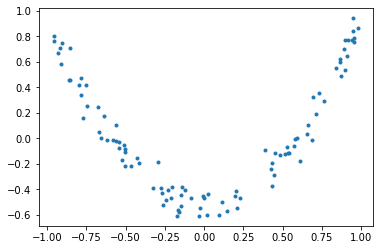

In [7]:
n = 100
x_obs = 2 * np.random.rand(n,1) - 1.0
y_obs = 1.4 * x_obs**2 - 0.5 + 0.1 * np.random.randn(n,1)
f, ax = pl.subplots()
ax.plot(x_obs[:,0], y_obs[:,0], '.')
print(x_obs.shape, y_obs.shape)

In [8]:
class model_nonlinear(nn.Module):
    def __init__(self):
        super(model_nonlinear, self).__init__()

        self.linear1 = nn.Linear(1, 10)
        self.linear2 = nn.Linear(10, 1)
        self.relu = nn.Tanh()
        
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        return self.linear2(out)
    
mod2 = model_nonlinear()

In [9]:
optimizer = torch.optim.Adam(mod2.parameters(), lr=5e-2)
loss_fn = nn.MSELoss()

x_torch = torch.from_numpy(x_obs.astype('float32'))
y_torch = torch.from_numpy(y_obs.astype('float32'))

for loop in range(100):
    optimizer.zero_grad()
    out = mod2(x_torch)
    loss = loss_fn(out, y_torch)
    loss.backward()
    optimizer.step()
    print(f' It : {loop:3d} - loss : {loss.item():.4f} - residual std : {np.sqrt(loss.item()):.4f}')

 It :   0 - loss : 0.5091 - residual std : 0.7135
 It :   1 - loss : 0.2506 - residual std : 0.5006
 It :   2 - loss : 0.2150 - residual std : 0.4637
 It :   3 - loss : 0.2507 - residual std : 0.5007
 It :   4 - loss : 0.2491 - residual std : 0.4991
 It :   5 - loss : 0.2188 - residual std : 0.4677
 It :   6 - loss : 0.1957 - residual std : 0.4423
 It :   7 - loss : 0.1940 - residual std : 0.4405
 It :   8 - loss : 0.2010 - residual std : 0.4483
 It :   9 - loss : 0.2006 - residual std : 0.4479
 It :  10 - loss : 0.1881 - residual std : 0.4337
 It :  11 - loss : 0.1679 - residual std : 0.4098
 It :  12 - loss : 0.1481 - residual std : 0.3848
 It :  13 - loss : 0.1352 - residual std : 0.3677
 It :  14 - loss : 0.1314 - residual std : 0.3625
 It :  15 - loss : 0.1340 - residual std : 0.3661
 It :  16 - loss : 0.1373 - residual std : 0.3705
 It :  17 - loss : 0.1360 - residual std : 0.3688
 It :  18 - loss : 0.1283 - residual std : 0.3582
 It :  19 - loss : 0.1160 - residual std : 0.3406


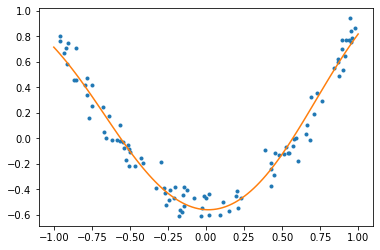

In [10]:
x_np = np.expand_dims(np.linspace(-1,1,100), axis=-1)
x = torch.from_numpy(x_np.astype('float32'))
out = mod2(x)
out_np = out.detach().numpy()
f, ax = pl.subplots()
ax.plot(x_obs[:,0], y_obs[:,0], '.')
ax.plot(x_np[:,0], out_np[:,0])

# Classification
Our aim here is to classify a set of points using a nonlinear classifier. Obviously both classes cannot be separated with a single hyperplane and we will test that.

## Linear classifier
Let us first start with a simple classification problem that can be solved using a linear classifier.

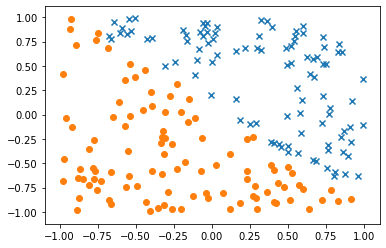

In [11]:
n = 200
x = 2*np.random.rand(n)-1
y = 2*np.random.rand(n)-1
X = np.array([x,y]).T
label = np.zeros(n, dtype='int')
label[(x+y)<0.1] = 1
pl.scatter(x[label==0], y[label==0], marker='x')
pl.scatter(x[label==1], y[label==1], marker='o')

In [12]:
class model_linear(nn.Module):
    def __init__(self):
        super(model_linear, self).__init__()

        self.linear1 = nn.Linear(2, 2)
        
    def forward(self, x):
        out = self.linear1(x)
        return out
    
    def predict(self, x):
        #Apply softmax to output. 
        pred = F.softmax(self.forward(x))
        return torch.argmax(pred, dim=1)
    
mod1 = model_linear()

In [13]:
optimizer = torch.optim.Adam(mod1.parameters(), lr=5e-2)
loss_fn = nn.CrossEntropyLoss()

X_torch = torch.from_numpy(X.astype('float32'))
label_torch = torch.from_numpy(label.astype('int'))

for loop in range(200):
    optimizer.zero_grad()
    out = mod1(X_torch)
    loss = loss_fn(out, label_torch)
    loss.backward()
    optimizer.step()
    print(f' It : {loop:3d} - loss : {loss.item():.4f}')

 It :   0 - loss : 0.6385
 It :   1 - loss : 0.5951
 It :   2 - loss : 0.5558
 It :   3 - loss : 0.5207
 It :   4 - loss : 0.4896
 It :   5 - loss : 0.4623
 It :   6 - loss : 0.4386
 It :   7 - loss : 0.4181
 It :   8 - loss : 0.4003
 It :   9 - loss : 0.3850
 It :  10 - loss : 0.3715
 It :  11 - loss : 0.3595
 It :  12 - loss : 0.3487
 It :  13 - loss : 0.3387
 It :  14 - loss : 0.3293
 It :  15 - loss : 0.3204
 It :  16 - loss : 0.3118
 It :  17 - loss : 0.3035
 It :  18 - loss : 0.2956
 It :  19 - loss : 0.2879
 It :  20 - loss : 0.2806
 It :  21 - loss : 0.2736
 It :  22 - loss : 0.2671
 It :  23 - loss : 0.2609
 It :  24 - loss : 0.2551
 It :  25 - loss : 0.2497
 It :  26 - loss : 0.2447
 It :  27 - loss : 0.2401
 It :  28 - loss : 0.2358
 It :  29 - loss : 0.2318
 It :  30 - loss : 0.2281
 It :  31 - loss : 0.2246
 It :  32 - loss : 0.2213
 It :  33 - loss : 0.2183
 It :  34 - loss : 0.2154
 It :  35 - loss : 0.2126
 It :  36 - loss : 0.2100
 It :  37 - loss : 0.2074
 It :  38 - 

/scratch/miniconda3.7/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]


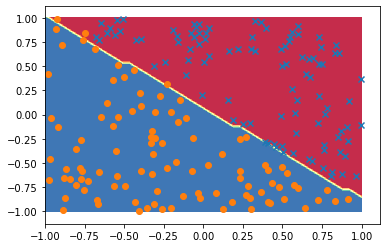

In [14]:
x_test = np.linspace(-1,1,50)
y_test = np.linspace(-1,1,50)
xx, yy = np.meshgrid(x_test, y_test)
X_test = np.array([xx,yy]).T.reshape((50*50,2))
X_test_torch = torch.from_numpy(X_test.astype('float32'))
out = mod1.predict(X_test_torch)
out = out.detach().numpy()
out = out.reshape((50,50))
pl.contourf(xx, yy, out, cmap=pl.cm.Spectral)
pl.scatter(x[label==0], y[label==0], marker='x')
pl.scatter(x[label==1], y[label==1], marker='o')

## Nonlinear classifier
Now we turn to a more difficult problem which cannot be solved by a linear classifier.

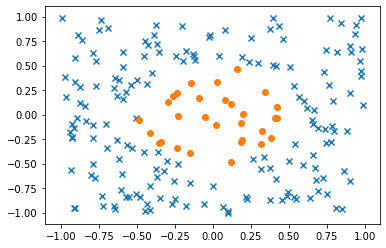

In [15]:
n = 200
x = 2*np.random.rand(n)-1
y = 2*np.random.rand(n)-1
X = np.array([x,y]).T
r = np.sqrt(x**2 + y**2)
label = np.zeros(n, dtype='int')
label[r<0.5] = 1
pl.scatter(x[label==0], y[label==0], marker='x')
pl.scatter(x[label==1], y[label==1], marker='o')

We need to define a nonlinear classifier.

In [16]:
class model_nonlinear(nn.Module):
    def __init__(self):
        super(model_nonlinear, self).__init__()

        self.linear1 = nn.Linear(2, 20)
        self.linear2 = nn.Linear(20, 2)
        self.activation = nn.Tanh()
        
    def forward(self, x):
        out = self.linear1(x)
        out = self.activation(out)
        return self.linear2(out)
    
    def predict(self, x):
        #Apply softmax to output. 
        pred = F.softmax(self.forward(x))
        return torch.argmax(pred, dim=1)
    
mod2 = model_nonlinear()

In [17]:
optimizer = torch.optim.Adam(mod2.parameters(), lr=5e-2)
loss_fn = nn.CrossEntropyLoss()

X_torch = torch.from_numpy(X.astype('float32'))
label_torch = torch.from_numpy(label.astype('int'))

for loop in range(200):
    optimizer.zero_grad()
    out = mod2(X_torch)
    loss = loss_fn(out, label_torch)
    loss.backward()
    optimizer.step()
    print(f' It : {loop:3d} - loss : {loss.item():.4f}')

 It :   0 - loss : 0.7847
 It :   1 - loss : 0.5262
 It :   2 - loss : 0.4453
 It :   3 - loss : 0.4537
 It :   4 - loss : 0.4822
 It :   5 - loss : 0.4985
 It :   6 - loss : 0.4972
 It :   7 - loss : 0.4831
 It :   8 - loss : 0.4636
 It :   9 - loss : 0.4457
 It :  10 - loss : 0.4343
 It :  11 - loss : 0.4310
 It :  12 - loss : 0.4338
 It :  13 - loss : 0.4385
 It :  14 - loss : 0.4414
 It :  15 - loss : 0.4405
 It :  16 - loss : 0.4364
 It :  17 - loss : 0.4307
 It :  18 - loss : 0.4254
 It :  19 - loss : 0.4221
 It :  20 - loss : 0.4215
 It :  21 - loss : 0.4228
 It :  22 - loss : 0.4247
 It :  23 - loss : 0.4258
 It :  24 - loss : 0.4255
 It :  25 - loss : 0.4236
 It :  26 - loss : 0.4207
 It :  27 - loss : 0.4175
 It :  28 - loss : 0.4149
 It :  29 - loss : 0.4134
 It :  30 - loss : 0.4129
 It :  31 - loss : 0.4128
 It :  32 - loss : 0.4120
 It :  33 - loss : 0.4101
 It :  34 - loss : 0.4069
 It :  35 - loss : 0.4029
 It :  36 - loss : 0.3989
 It :  37 - loss : 0.3950
 It :  38 - 

/scratch/miniconda3.7/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


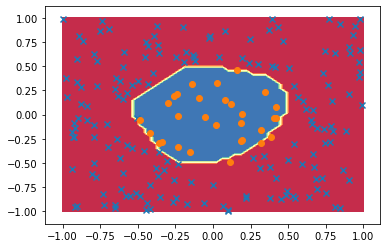

In [18]:
x_test = np.linspace(-1,1,50)
y_test = np.linspace(-1,1,50)
xx, yy = np.meshgrid(x_test, y_test)
X_test = np.array([xx,yy]).T.reshape((50*50,2))
X_test_torch = torch.from_numpy(X_test.astype('float32'))
out = mod2.predict(X_test_torch)
out = out.detach().numpy()
out = out.reshape((50,50))
pl.contourf(xx, yy, out, cmap=pl.cm.Spectral)
pl.scatter(x[label==0], y[label==0], marker='x')
pl.scatter(x[label==1], y[label==1], marker='o')

## Regression with a convolutional neural network
Let us assume that we want to infer the velocity and width from a set of spectral lines. Let's generate a training set in which velocities and widths of Gaussian lines are varied randomly and add a little bit of noise.

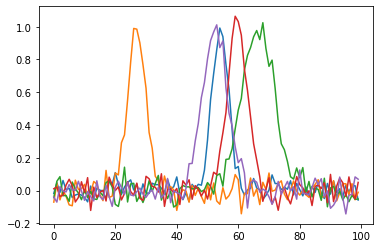

In [19]:
n_profiles = 1000
n_lambda = 100
noise = 0.05
wvl = np.linspace(-10,10,n_lambda)
v = np.random.uniform(low=-5.0, high=5.0, size=n_profiles)
dv = np.random.uniform(low=0.5, high=1.5, size=n_profiles)
stokes = np.exp(-(wvl[None,:]+v[:,None])**2 / dv[:,None]**2)
stokes += np.random.normal(loc=0.0, scale=noise, size=stokes.shape)

stokes = np.expand_dims(stokes, axis=1)

for i in range(5):
    pl.plot(stokes[i,0,:])

This time we generate a nonlinear model but using in this case convolution operations. We convolve the input profiles with 10 kernels of size 7$\times$7 with a stride of 2 twice. Finally we flatten the result and use a final fully connected layer.

In [20]:
class model_nonlinear(nn.Module):
    def __init__(self):
        super(model_nonlinear, self).__init__()

        self.C1 = nn.Conv1d(1, 10, kernel_size=7, stride=2)
        self.C2 = nn.Conv1d(10, 10, kernel_size=7, stride=2)
        self.linear = nn.Linear(21*10, 2)
        self.activation = nn.ReLU()
        
    def forward(self, x):
        out = self.C1(x)
        out = self.activation(out)
        out = self.C2(out)
        out = self.activation(out)

        out = out.view(x.size(0), -1)

        return self.linear(out)

In [21]:
mod2 = model_nonlinear()

optimizer = torch.optim.Adam(mod2.parameters(), lr=5e-2)
loss_fn = nn.MSELoss()

Y = np.array([v, dv]).T
X_torch = torch.from_numpy(stokes.astype('float32'))
Y_torch = torch.from_numpy(Y.astype('float32'))

for loop in range(500):
    optimizer.zero_grad()
    out = mod2(X_torch)
    loss = loss_fn(out, Y_torch)
    loss.backward()
    optimizer.step()
    print(f' It : {loop:3d} - loss : {loss.item():.4f}')

 It :   0 - loss : 4.6996
 It :   1 - loss : 4.5653
 It :   2 - loss : 4.1703
 It :   3 - loss : 4.3065
 It :   4 - loss : 3.3142
 It :   5 - loss : 2.3297
 It :   6 - loss : 0.9321
 It :   7 - loss : 0.9879
 It :   8 - loss : 1.2735
 It :   9 - loss : 0.5788
 It :  10 - loss : 0.5909
 It :  11 - loss : 0.8397
 It :  12 - loss : 0.7559
 It :  13 - loss : 0.4746
 It :  14 - loss : 0.3597
 It :  15 - loss : 0.5320
 It :  16 - loss : 0.6020
 It :  17 - loss : 0.4410
 It :  18 - loss : 0.3570
 It :  19 - loss : 0.4134
 It :  20 - loss : 0.4732
 It :  21 - loss : 0.4539
 It :  22 - loss : 0.3713
 It :  23 - loss : 0.3135
 It :  24 - loss : 0.3564
 It :  25 - loss : 0.3655
 It :  26 - loss : 0.3051
 It :  27 - loss : 0.2849
 It :  28 - loss : 0.3040
 It :  29 - loss : 0.3072
 It :  30 - loss : 0.2862
 It :  31 - loss : 0.2738
 It :  32 - loss : 0.2842
 It :  33 - loss : 0.2825
 It :  34 - loss : 0.2618
 It :  35 - loss : 0.2546
 It :  36 - loss : 0.2630
 It :  37 - loss : 0.2606
 It :  38 - 

 It : 333 - loss : 0.0065
 It : 334 - loss : 0.0065
 It : 335 - loss : 0.0065
 It : 336 - loss : 0.0064
 It : 337 - loss : 0.0063
 It : 338 - loss : 0.0062
 It : 339 - loss : 0.0062
 It : 340 - loss : 0.0061
 It : 341 - loss : 0.0060
 It : 342 - loss : 0.0060
 It : 343 - loss : 0.0060
 It : 344 - loss : 0.0060
 It : 345 - loss : 0.0060
 It : 346 - loss : 0.0060
 It : 347 - loss : 0.0060
 It : 348 - loss : 0.0060
 It : 349 - loss : 0.0060
 It : 350 - loss : 0.0060
 It : 351 - loss : 0.0060
 It : 352 - loss : 0.0061
 It : 353 - loss : 0.0062
 It : 354 - loss : 0.0064
 It : 355 - loss : 0.0067
 It : 356 - loss : 0.0073
 It : 357 - loss : 0.0081
 It : 358 - loss : 0.0092
 It : 359 - loss : 0.0110
 It : 360 - loss : 0.0123
 It : 361 - loss : 0.0139
 It : 362 - loss : 0.0130
 It : 363 - loss : 0.0115
 It : 364 - loss : 0.0085
 It : 365 - loss : 0.0064
 It : 366 - loss : 0.0059
 It : 367 - loss : 0.0068
 It : 368 - loss : 0.0081
 It : 369 - loss : 0.0086
 It : 370 - loss : 0.0080
 It : 371 - 

Text(0, 0.5, 'dv predicted')

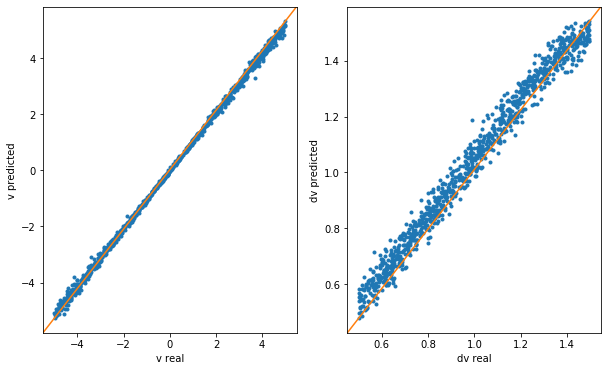

In [25]:
out_numpy = out.detach().numpy()
f, ax = pl.subplots(nrows=1, ncols=2, figsize=(10,6))
ax[0].plot(v.flatten(), out_numpy[:,0], '.')
ax[0].plot([0, 1], [0, 1], transform=ax[0].transAxes)
ax[0].set_xlabel('v real')
ax[0].set_ylabel('v predicted')
ax[1].plot(dv.flatten(), out_numpy[:,1], '.')
ax[1].plot([0, 1], [0, 1], transform=ax[1].transAxes)
ax[1].set_xlabel('dv real')
ax[1].set_ylabel('dv predicted')